In [42]:
import importlib
import Policy 
import Environment
import Diadic


from tqdm.auto import tqdm

importlib.reload(Policy)
importlib.reload(Environment)
importlib.reload(Diadic)
import matplotlib.pyplot as plt
import numpy as np

In [43]:
class Simulator:
    def __init__(self, algos, env, T):
        """
        algos: dict {name: algo_instance}
        """
        self.algos = algos  # dictionary of algorithms
        self.env = env
        self.T = T
        self.regrets = {name: [] for name in algos}  # track regrets for each algorithm

    def run(self):
        for t in tqdm(range(self.T)):
            for name, algo in self.algos.items():
                x_t = algo.choose_action()
                y_t = self.env.get_reward(t, x_t)
                algo.update(x_t, y_t)
                self.update_regret(name, t, x_t)

    def update_regret(self, name, t, x_t):
        best_mean_value_t = 1  # true best arm mean at time t (depends on env)
        r_t = best_mean_value_t - self.env.get_reward(t, x_t)
        self.regrets[name].append(r_t)

    def plot_regrets(self):
            plt.figure(figsize=(10, 6))
            for name, r_list in self.regrets.items():
                cumulative_regret = np.cumsum(r_list)
                plt.plot(cumulative_regret, label=name)

            plt.title("Cumulative Regret Comparison")
            plt.xlabel("Time")
            plt.ylabel("Cumulative Regret")
            plt.legend()
            plt.tight_layout()
            plt.show()


CENTERSSSS =  [0.2, 0.8, 0.2, 0.8]
Entering Episode 1
Entering Block 3


/Users/nicolasnguyen/Documents/Projets/Non-Stationary Lipschitz Bandits/NS_Lipschitz_Bandits/Policy.py:262: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


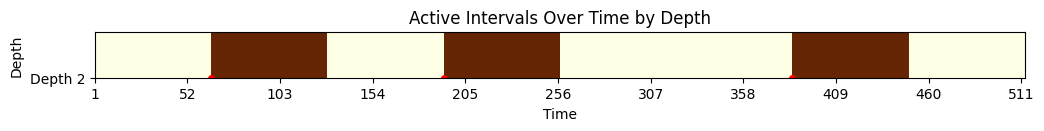

K optimal =  11


100%|██████████| 16000/16000 [00:00<00:00, 69436.95it/s]


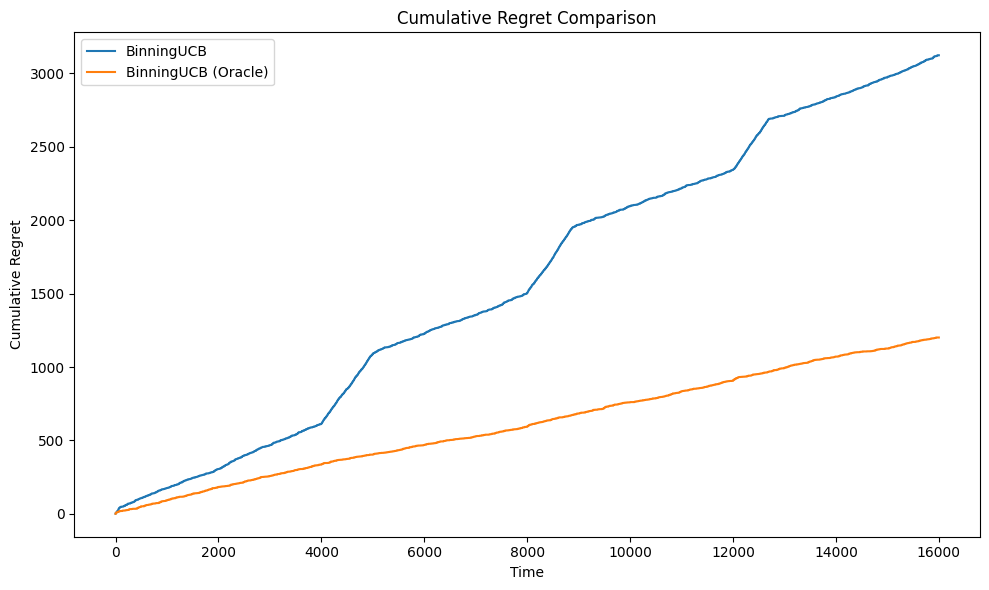

In [44]:
nb_shifts = 4
phase_length = 4000
T = nb_shifts*phase_length
env = Environment.Environment(T, nb_shifts)

algo_MBDE = Policy.MBDE(T, c0=0.2)
algo_BinningUCB = Policy.BinningUCB(T)
algo_BinningUCB_Oracle = Policy.BinningUCB_Oracle(T, nb_shifts)

sim = Simulator(
    algos={
        #"BinningUCB": algo_BinningUCB,
        #"BinningUCB (Oracle)": algo_BinningUCB_Oracle,
        "MBDE": algo_MBDE,
    },
    env=env,
    T=T
)

sim.run()
sim.plot_regrets()


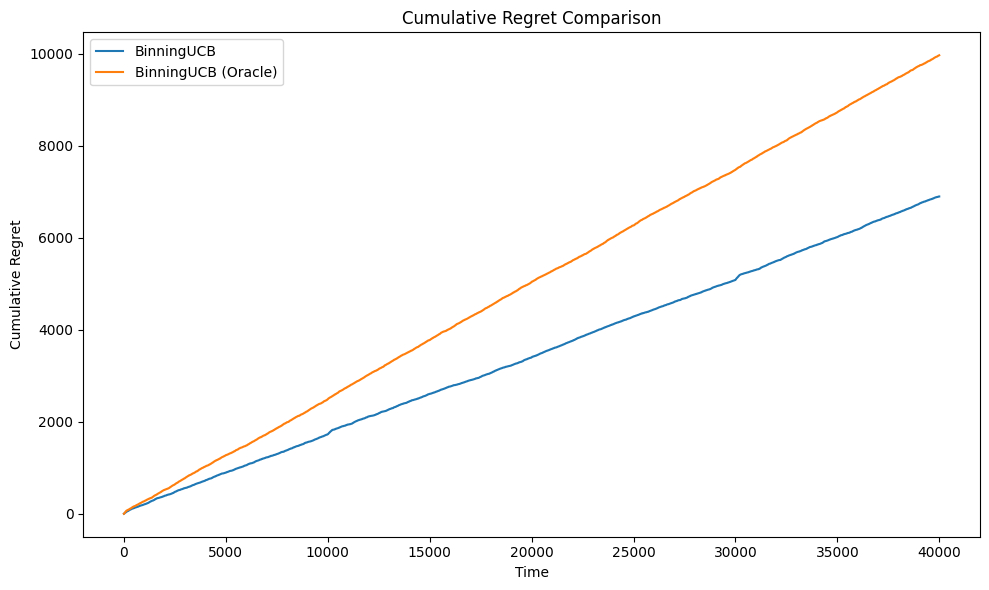

In [35]:
sim.plot_regrets()

In [ ]:
sim.algos['MBDE'].tree.visualize()

## Test environements

In [ ]:
nb_shifts = 4
phase_length = 2000
T = nb_shifts*phase_length
env = Environment.Environment(T, nb_shifts)

In [ ]:
x_list = list(np.linspace(0, 1, 1000))
for t_test in np.linspace(1, T-1, 100) :
        
    y_list = [env.mean_reward(int(t_test), x) for x in x_list]
    plt.plot(y_list)